https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook

Thank You for opening this notebook!!!
This notebook tutorial is for those who are beginners to machine learning.
In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.

1. Random Forest Classifier

2. Stochastic Gradient Descent Classifier

3. Support Vector Classifier(SVC)

Then I use cross validation evaluation technique to optimize the model performance.

1. Grid Search CV

2. Cross Validation Score

In [48]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('./input/winequality-red.csv')

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.shape

(1599, 12)

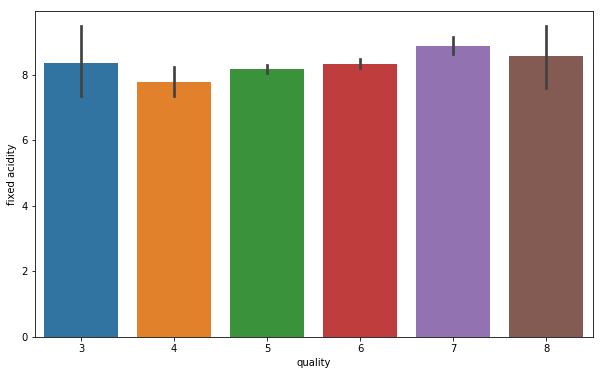

In [13]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

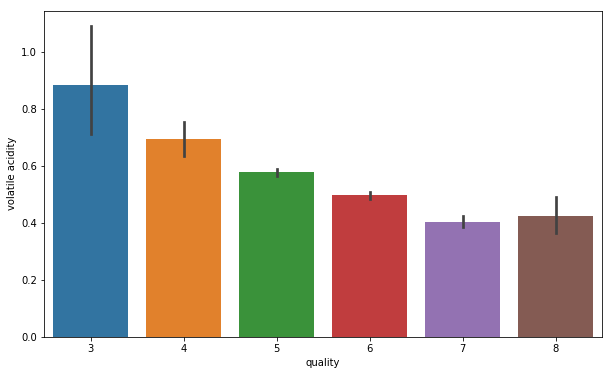

In [14]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

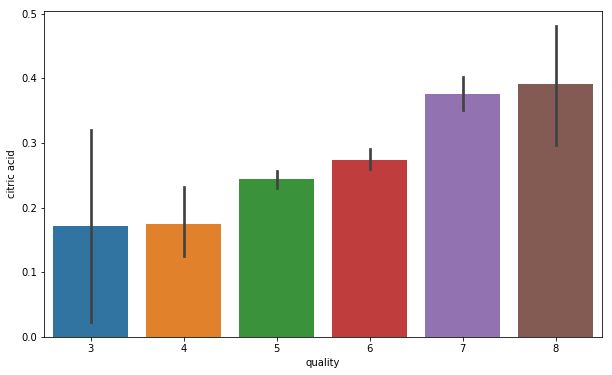

In [15]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

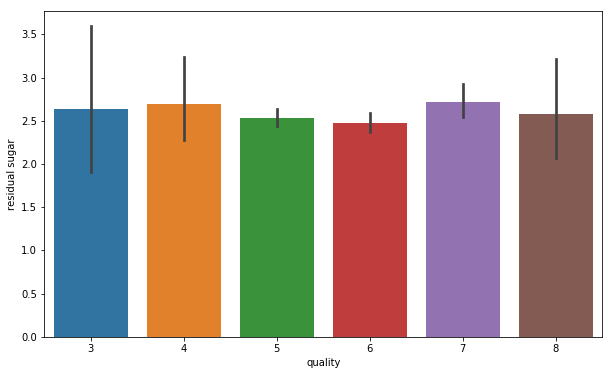

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

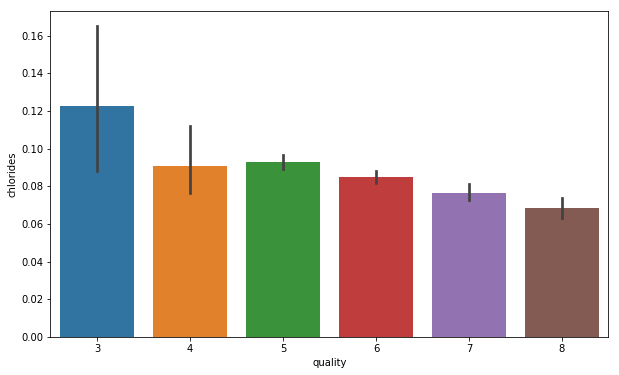

In [17]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

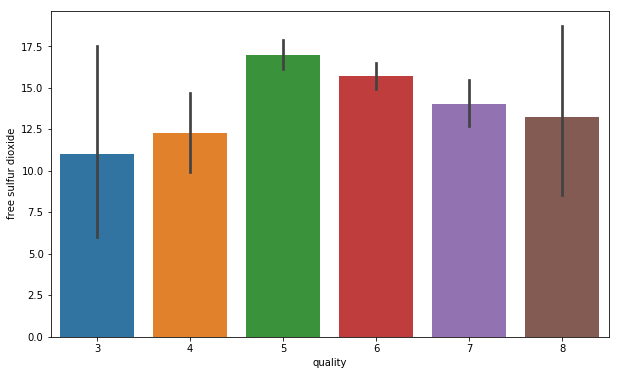

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

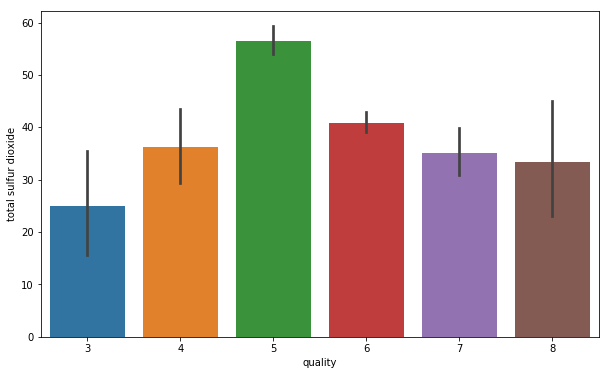

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

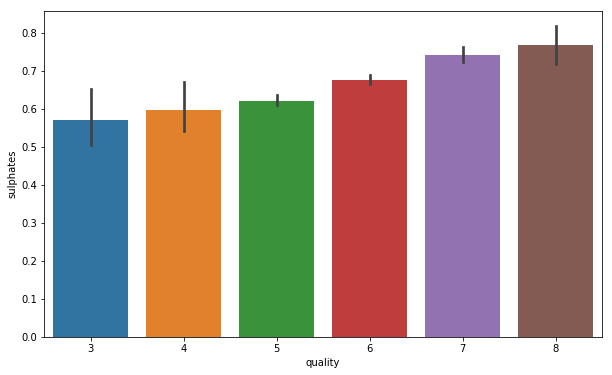

In [20]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

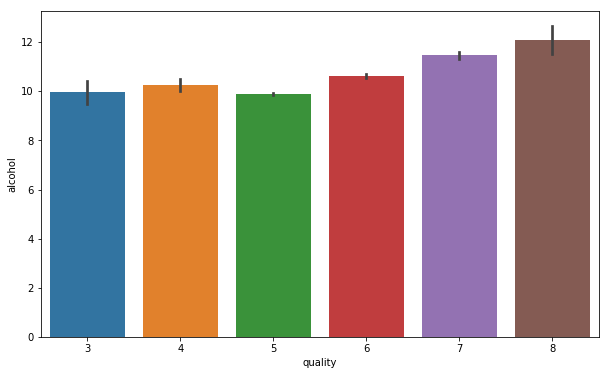

In [21]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Preprocessing Data for performing Machine learning algorithms

In [23]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [24]:
wine.quality

0        bad
1        bad
2        bad
3        bad
4        bad
5        bad
6        bad
7       good
8       good
9        bad
10       bad
11       bad
12       bad
13       bad
14       bad
15       bad
16      good
17       bad
18       bad
19       bad
20       bad
21       bad
22       bad
23       bad
24       bad
25       bad
26       bad
27       bad
28       bad
29       bad
        ... 
1569     bad
1570     bad
1571     bad
1572     bad
1573     bad
1574     bad
1575     bad
1576     bad
1577     bad
1578     bad
1579     bad
1580     bad
1581     bad
1582     bad
1583     bad
1584    good
1585     bad
1586     bad
1587     bad
1588     bad
1589     bad
1590     bad
1591     bad
1592     bad
1593     bad
1594     bad
1595     bad
1596     bad
1597     bad
1598     bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [25]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [26]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [27]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

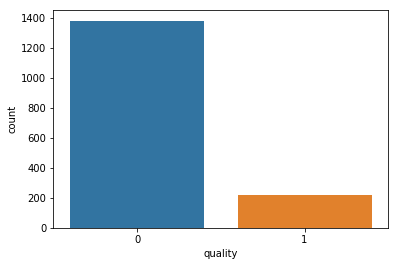

In [28]:
sns.countplot(wine['quality'])

In [29]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [30]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [33]:
X_train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithm

** Random Forest Classifier**

In [35]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [36]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.71      0.36      0.48        47

avg / total       0.87      0.88      0.87       320



* Random forest gives the accuracy of 87% *

In [37]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 30  17]]


# Stochastic Gradient Decent Classifier

In [38]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [39]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90       273
          1       0.45      0.51      0.48        47

avg / total       0.85      0.84      0.84       320



## 84% accuracy using stochastic gradient descent classifier

In [40]:
print(confusion_matrix(y_test, pred_sgd))

[[244  29]
 [ 23  24]]


# Support Vector Classifier

In [41]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [42]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



 ## Support vector classifier gets 86%

# Let's try to increase our accuracy of models

Grid Search CV

In [43]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [44]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [46]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.34      0.49        47

avg / total       0.90      0.90      0.88       320



## SVC improves from 86% to 90% using Grid Search CV¶

# Cross Validation Score for random forest and SGD

In [47]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.910894438976378

## Random forest accuracy increases from 87% to 91 % using cross validation score